In [ ]:
!pip install phate scprep scanpy gdown pandas==2.2.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.0/54.0 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of scprep to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 113.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.4/104.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 79.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.3/169.3 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 103.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
# Core scientific computing and data analysis libraries
import numpy as np          # Numerical computing library for array operations and mathematical functions
import pandas as pd         # Data manipulation and analysis library for structured data (DataFrames)
import matplotlib.pyplot as plt  # Plotting library for creating visualizations and charts
import seaborn as sns
# Single-cell analysis framework
import scanpy as sc         # Single-cell analysis toolkit for preprocessing, visualization, and analysis

# Display matplotlib plots directly in notebook cells
%matplotlib inline

# Specialized single-cell and dimensionality reduction libraries
import phate               # PHATE algorithm for dimensionality reduction and data visualization
import scprep              # Single-cell data preprocessing utilities and helper functions

# System and file handling libraries
import gdown               # Google Drive file downloader for accessing shared datasets

In [ ]:
file_id = "1VCl5Gqpa-z99t9Ve0IP_ie_JVGbiYBN2" #File id in google drive for our data
url = f"https://drive.google.com/uc?id={file_id}"
output = "tnbc.h5ad"
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1VCl5Gqpa-z99t9Ve0IP_ie_JVGbiYBN2
From (redirected): https://drive.google.com/uc?id=1VCl5Gqpa-z99t9Ve0IP_ie_JVGbiYBN2&confirm=t&uuid=658da330-91d8-4ce8-a0b9-4146165d579e
To: /content/tnbc.h5ad
100%|██████████| 523M/523M [00:05<00:00, 97.8MB/s]


'tnbc.h5ad'

In [ ]:
# Now, let's read the data we downloaded. For this, we will use scanpy's read_h5ad function.
adata = sc.read_h5ad("tnbc.h5ad")
adata

AnnData object with n_obs × n_vars = 16985 × 21465
    obs: 'n_counts', 'batch', 'day', 'new', 'sample_id', 'growth', 'log_growth', 'sample_labels', 'louvain', 'S_score', 'G2M_score', 'phase', 'emt_scores'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts', 'is_emt'
    uns: 'emt_weights', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'phase_colors', 'sample_id_colors'
    obsm: 'X_pca', 'X_phate'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [ ]:
# Here, we transform our adata.X into a pandas DataFrame, so it is easier to manipulate.
# We just need to define which are the column names.

data = pd.DataFrame(adata.X.toarray(), index=adata.obs_names, columns=adata.var_names)
sample_labels = adata.obs['sample_id']

In [ ]:
data

,AL627309.1,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,AL645608.5,AL645608.1,SAMD11,NOC2L,...,AC136616.1,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC240274.1
AAACCTGAGTTCGCGC-1-4,0.0,0.0,0.0,0.0,0.0,0.881339,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGGACCCT-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.893713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGTTGAC-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.960031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCGAACAG-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.094286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCCGTTGCT-1-4,0.0,0.0,0.0,0.0,0.0,1.160205,0.0,1.160205,1.160205,1.160205,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTTCCGCTGTT-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCTGCGGCA-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCACAGTCTTCC-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.970280,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTACTTGAC-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,1.137588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sample_labels

,sample_id
AAACCTGAGTTCGCGC-1-4,0
AAACCTGCAGGACCCT-1-4,0
AAACCTGCATGTTGAC-1-4,0
AAACCTGGTCGAACAG-1-4,0
AAACCTGTCCGTTGCT-1-4,0
...,...
TTTGGTTTCCGCTGTT-1-8,30
TTTGGTTTCTGCGGCA-1-8,30
TTTGTCACAGTCTTCC-1-8,30
TTTGTCAGTACTTGAC-1-8,30


<Axes: xlabel='Library size', ylabel='Number of cells'>

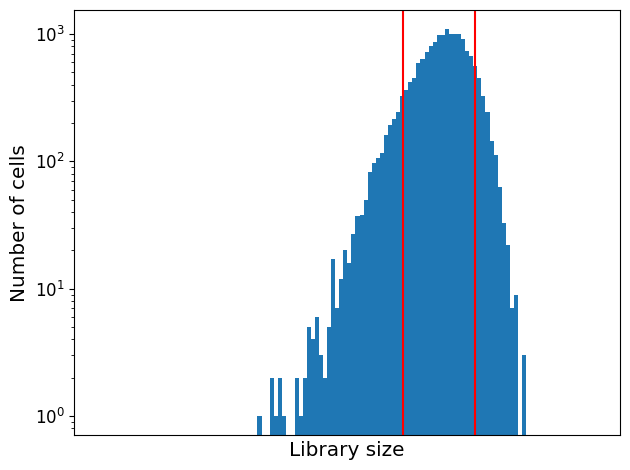

In [ ]:
# Visualize the parts of the data we will drop.
# We will keep drop the bellow 10 and above 90 percentiles.
scprep.plot.plot_library_size(data, percentile=[10,90])

In [ ]:
# Here you can change the percentile to remove more or less cell from processing
# Here we pass sample_labels so we can "drop" the sample labels as well.

data, sample_labels = scprep.filter.filter_library_size(data,sample_labels, percentile=10, keep_cells='above')
data, sample_labels = scprep.filter.filter_library_size(data,sample_labels, percentile=90, keep_cells='below')

In [ ]:
data


,AL627309.1,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,AL645608.5,AL645608.1,SAMD11,NOC2L,...,AC136616.1,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC240274.1
AAACCTGAGTTCGCGC-1-4,0.0,0.0,0.0,0.0,0.0,0.881339,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGGACCCT-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.893713,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGTTGAC-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.960031,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCGAACAG-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.094286,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCCTAGAAC-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTACCGGCT-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCAAAGTAG-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCCGCTGTT-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTACTTGAC-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.137588,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = scprep.filter.filter_rare_genes(data, min_cells=10)

In [ ]:
data

,AL627309.1,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.3,AL645608.1,SAMD11,NOC2L,KLHL17,...,AC136616.1,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC004556.1,AC240274.1
AAACCTGAGTTCGCGC-1-4,0.0,0.0,0.0,0.0,0.0,0.881339,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCAGGACCCT-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.893713,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGCATGTTGAC-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.960031,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGGTCGAACAG-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.094286,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACCTGTCCTAGAAC-1-4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGGTTGTACCGGCT-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.744694,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCAAAGTAG-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGGTTTCCGCTGTT-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TTTGTCAGTACTTGAC-1-8,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.137588,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data = scprep.normalize.library_size_normalize(data)

<Axes: xlabel='Gene expression', ylabel='Number of cells'>

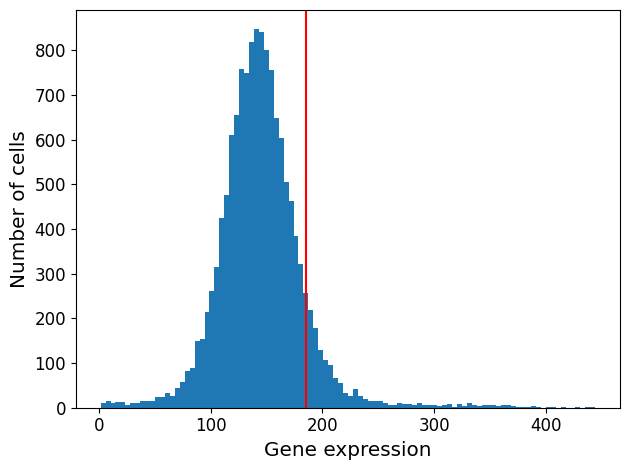

In [ ]:
mito_genes = scprep.select.get_gene_set(data, starts_with="MT-") # Get all mitochondrial genes. There are 14, FYI.
scprep.plot.plot_gene_set_expression(data, genes=mito_genes, percentile=90)

In [ ]:
data, sample_labels = scprep.filter.filter_gene_set_expression(
    data, sample_labels, genes=mito_genes,
    percentile=90, keep_cells='below')

In [ ]:
data = scprep.transform.sqrt(data)

In [ ]:
#We can use scprep to compute the pca. We will use 200 components.
data_pca = scprep.reduce.pca(data, n_components=200, method='dense')

In [ ]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC191,PC192,PC193,PC194,PC195,PC196,PC197,PC198,PC199,PC200
AAACCTGAGTTCGCGC-1-4,9.813778,14.656211,0.218190,3.869144,-1.304579,-0.990715,-0.665487,6.838850,0.708812,-0.963550,...,-0.548014,0.406021,1.049877,0.100016,0.004538,0.872977,1.128695,-3.428531,-0.404387,1.563693
AAACCTGCAGGACCCT-1-4,11.983418,16.068243,3.843429,-2.072135,-3.374058,1.710403,-8.636198,-1.896121,-2.921635,-1.614430,...,0.182841,0.398084,-0.292402,0.087923,1.738607,-1.813092,-0.384060,0.695923,1.359888,-1.922566
AAACCTGCATGTTGAC-1-4,-1.813711,15.971506,10.309142,0.144292,-5.248152,0.796967,1.889456,4.396162,-0.598065,4.219632,...,0.221253,1.305844,-0.317203,0.381319,-0.884027,0.604516,0.139111,0.103571,-1.046233,0.621068
AAACCTGTCCTAGAAC-1-4,9.559802,15.489730,1.884341,0.063857,6.785091,3.755945,-3.849636,-6.149412,-6.132789,4.599761,...,0.792466,0.851403,0.395444,0.319222,0.245511,0.239699,0.130954,0.850169,1.419192,-0.989991
AAACCTGTCTACTATC-1-4,8.002625,16.235704,3.081499,-1.623210,-2.592869,-3.766152,-4.424543,4.682849,3.992876,0.673442,...,0.239221,1.505012,-0.608783,-1.417422,1.845331,-1.312818,-0.475392,-1.859706,-0.452251,-1.045720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGCGCTCCAGAAGG-1-8,-17.122189,4.407280,-0.183998,11.937671,-2.166360,-2.447795,0.869325,1.692818,-2.127406,1.391592,...,-0.624034,-1.535755,-1.207272,-0.880030,-1.937833,-0.989593,0.148721,0.735345,-0.102492,0.180102
TTTGGTTAGATGTGGC-1-8,-23.768064,4.166540,-0.157164,5.289501,5.970974,-1.215600,1.043553,1.407911,2.930260,2.210178,...,-0.223005,0.329385,-0.511426,-1.021377,0.439088,0.503182,-0.278665,-1.219686,-0.128536,3.244813
TTTGGTTGTACCGGCT-1-8,-19.044155,-0.449963,-3.901133,8.154743,-0.064927,-1.206589,-1.969340,1.071410,0.883184,-2.319953,...,-1.958615,0.085673,0.194514,-1.829125,0.752310,0.259377,-0.474686,-0.948115,-0.267743,-1.718781
TTTGGTTTCAAAGTAG-1-8,-22.019972,4.364359,-1.056932,5.220767,4.494470,-1.745845,2.783640,-1.712114,4.521570,1.095681,...,-0.263452,-1.070511,0.031474,-2.699969,-1.469750,-0.122579,1.410026,1.007681,-1.738628,-0.427151


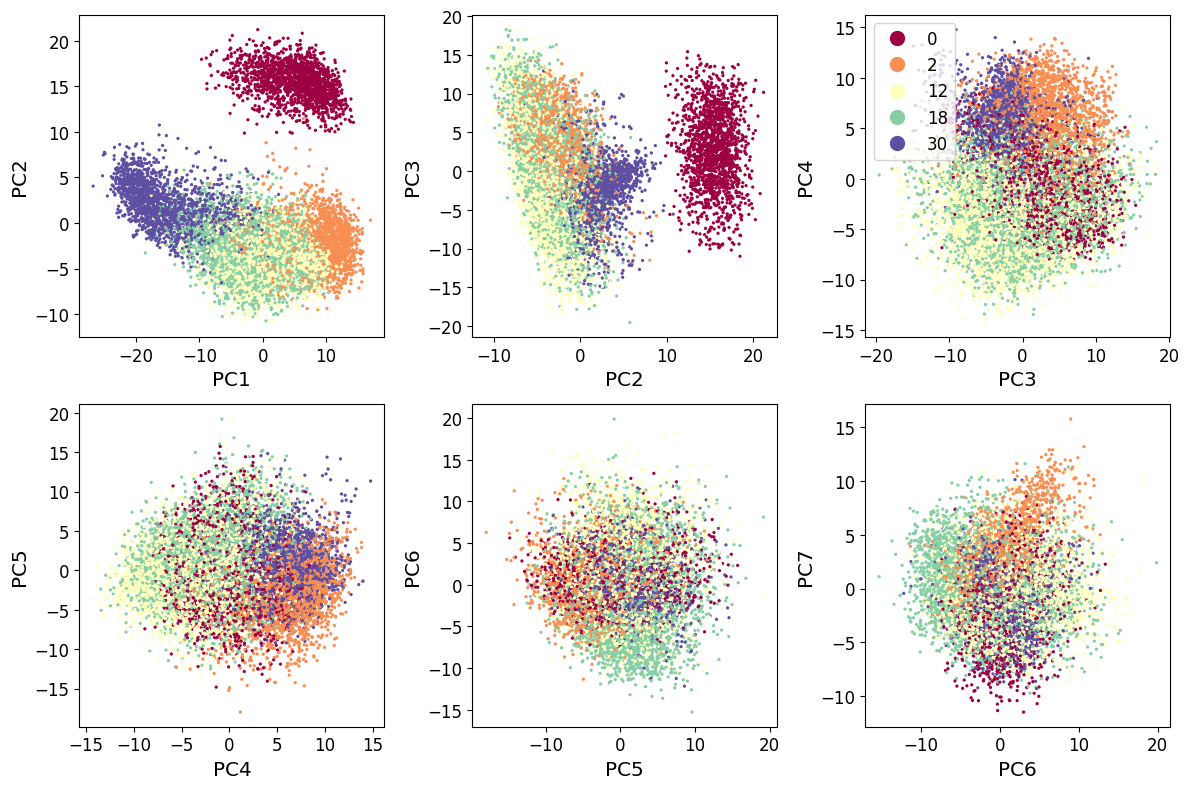

In [ ]:
# Create a figure (the background) and a set of axes (the things we plot on)
fig, axes = plt.subplots(2,3, figsize=(12,8))
# This makes it easier to iterate through the axes
axes = axes.flatten()

for i, ax in enumerate(axes):
    # only plot a legend on one axis
    legend = True if i == 2 else False
    # There are a lot of parameters here, you can find the full scatter documentation at
    # https://scprep.readthedocs.io/en/stable/reference.html#scprep.plot.scatter
    scprep.plot.scatter(data_pca.iloc[:,i], data_pca.iloc[:,i+1],
                        c=sample_labels,
                        cmap='Spectral', ax=ax,
                        # label_prefix="PC",
                        legend=legend)
fig.tight_layout()

In [ ]:
data.columns[:10]


Index(['AL627309.1', 'AL669831.5', 'FAM87B', 'LINC00115', 'FAM41C',
       'AL645608.3', 'AL645608.1', 'SAMD11', 'NOC2L', 'KLHL17'],
      dtype='object')

<Axes: title={'center': 'SMAD4'}, xlabel='PC1', ylabel='PC2'>

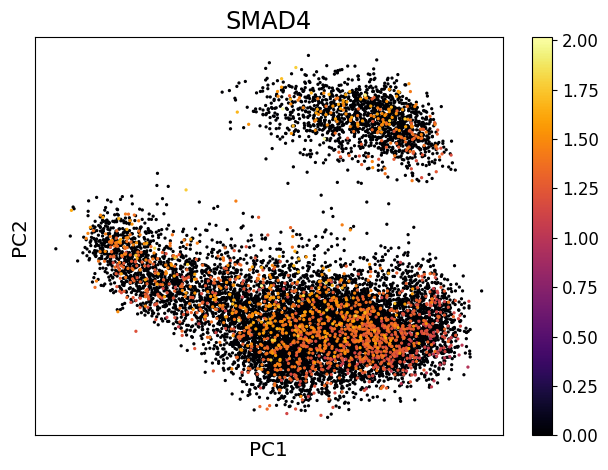

In [ ]:
gene = 'SMAD4'

expression = scprep.select.select_cols(data, exact_word=gene)

# we will sort cells by maximum expression so we can see where the gene is expressed
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                     title=gene, ticks=None, label_prefix='PC')

In [ ]:
[col for col in data.columns if 'POU5' in col or 'OCT' in col]


['NOCT', 'POU5F2', 'POU5F1B']

<Axes: title={'center': 'NOCT'}, xlabel='PC1', ylabel='PC2'>

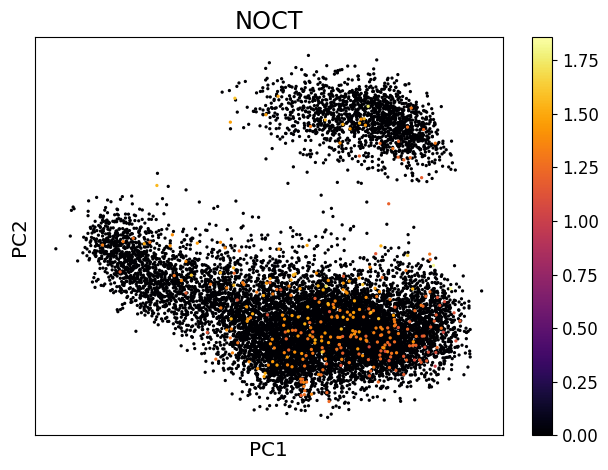

In [ ]:
gene = 'NOCT'

expression = scprep.select.select_cols(data, exact_word=gene)

# we will sort cells by maximum expression so we can see where the gene is expressed
sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                     title=gene, ticks=None, label_prefix='PC')

✅ All genes found.


<Axes: title={'center': 'Stemness score'}, xlabel='PC1', ylabel='PC2'>

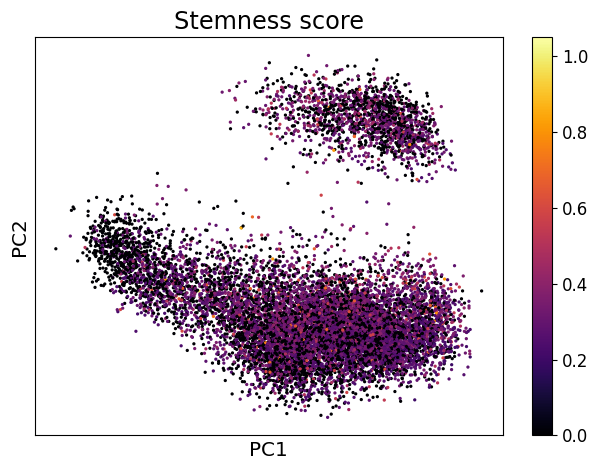

In [ ]:
stemness_genes = ['POU5F1B', 'SOX2', 'NANOG', 'KLF4', 'MYC']

# Select the exact matching columns
expression = scprep.select.select_cols(data, exact_word=stemness_genes)

# Handle missing genes gracefully
found = expression.columns.tolist()
missing = [g for g in stemness_genes if g not in found]

if missing:
    print(f"⚠️ Missing genes not found in dataset: {missing}")
else:
    print("✅ All genes found.")

# Compute and plot mean stemness expression
scprep.plot.scatter2d(
    data_pca,
    c=expression.mean(axis=1),
    title="Stemness score",
    ticks=None,
    label_prefix='PC'
)


<Axes: title={'center': 'TGFBR1'}, xlabel='PC1', ylabel='PC2'>

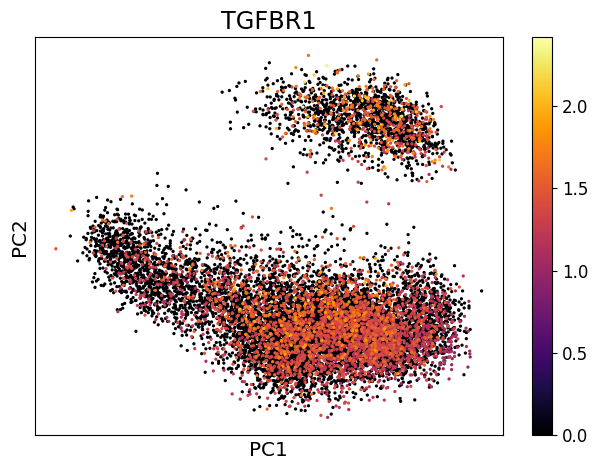

In [ ]:
gene = 'TGFBR1' #(TGF_BETA))

# ================
# Sort cells by maximum expression of HAND1 and plot the result on PCA
expression = scprep.select.select_cols(data, exact_word=gene)

sort_index = expression.sort_values().index

scprep.plot.scatter2d(data_pca.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                     title=gene, ticks=None, label_prefix='PC')
# ===============

In [ ]:
Running this should take ~1-3 minutes.

In [ ]:
# First we define the phate operator, that we will use to run the dimensionality reduction.
phate_op = phate.PHATE( n_components=2,
                        knn=5,
                        decay=15,
                        t='auto',
                        gamma=1,
                        n_jobs=-2)

data_phate = phate_op.fit_transform(data) #Now we do our transformation, going from data into the 2 phate dimensions.
df_phate = pd.DataFrame(data_phate, index=data.index) #We transform our output into a Pandas DataFrame just to facilitate exploration

Calculating PHATE...
  Running PHATE on 12381 observations and 18968 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 24.37 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.86 seconds.
    Calculating affinities...
    Calculated affinities in 8.80 seconds.
  Calculated graph and diffusion operator in 35.55 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.53 seconds.
    Calculating KMeans...
    Calculated KMeans in 12.52 seconds.
  Calculated landmark operator in 17.06 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 7.51 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.30 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 6.80 seconds.
Calculated PHATE in 70.63 seconds.


In [ ]:
df_phate

,0,1
AAACCTGAGTTCGCGC-1-4,-0.040026,0.002669
AAACCTGCAGGACCCT-1-4,-0.044325,-0.004347
AAACCTGCATGTTGAC-1-4,-0.039917,0.001647
AAACCTGTCCTAGAAC-1-4,-0.047120,-0.006234
AAACCTGTCTACTATC-1-4,-0.039549,0.002529
...,...,...
TTTGCGCTCCAGAAGG-1-8,0.009551,-0.019099
TTTGGTTAGATGTGGC-1-8,0.008950,-0.020633
TTTGGTTGTACCGGCT-1-8,0.009612,-0.016211
TTTGGTTTCAAAGTAG-1-8,0.009040,-0.019876


<Axes: xlabel='PHATE1', ylabel='PHATE2'>

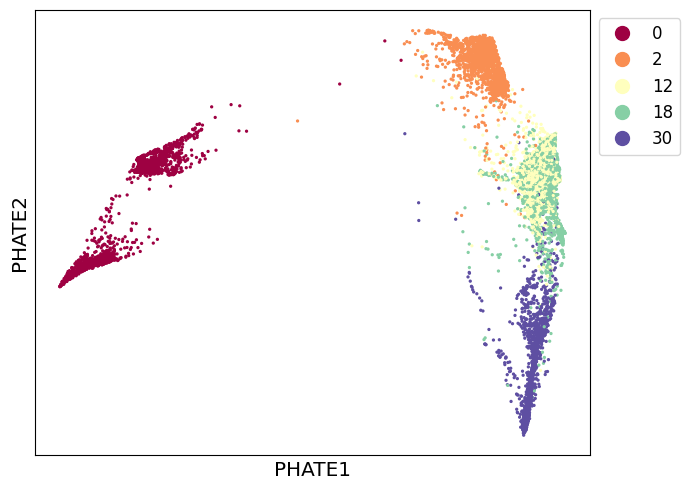

In [ ]:
# ================
# Plot the PHATE coordinates
# colored by time point of collection
scprep.plot.scatter2d(df_phate, c=sample_labels, cmap='Spectral',
                      ticks=False, label_prefix='PHATE',
                      legend_anchor=(1,1), figsize=(7,5))
# ================

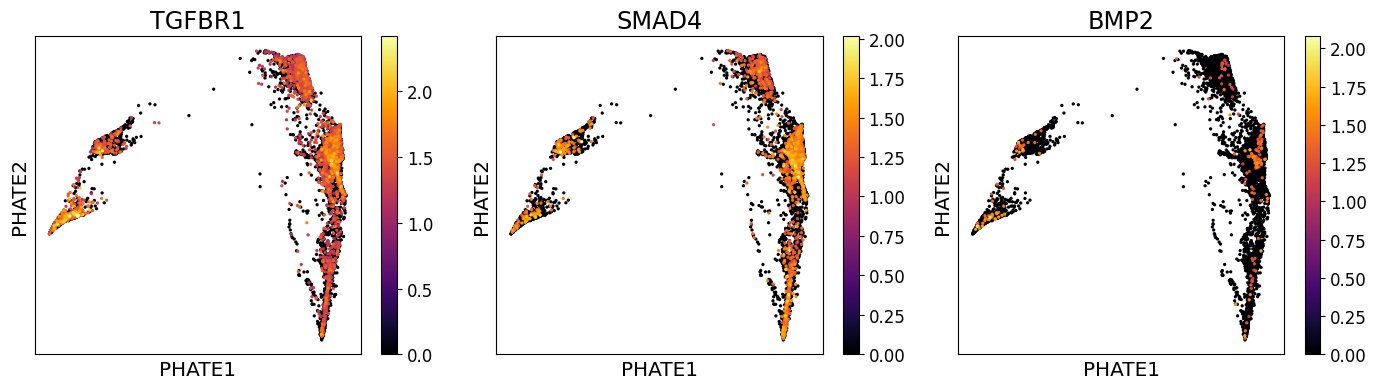

In [ ]:
# ================
# Plot three subplots of the PHATE coordinates
genes_for_plotting = ['TGFBR1','SMAD4','BMP2']

fig, axes = plt.subplots(1,3, figsize=(14,4))
axes = axes.flatten()

for gene, ax in zip(genes_for_plotting, axes.flatten()):
    expression = scprep.select.select_cols(data, exact_word=gene)

    sort_index = expression.sort_values().index

    scprep.plot.scatter2d(df_phate.loc[sort_index], c=expression.loc[sort_index], shuffle=False,
                         title=gene, ticks=None, label_prefix='PHATE', ax=ax)

fig.tight_layout()
# ================

In [ ]:
from scipy import stats

expression_df = data
cell_labels = sample_labels

# =============================================================================
# FIND DIFFERENTIALLY EXPRESSED GENES FOR EPCAM+/CD44+ POPULATION
# =============================================================================
# Define EPCAM+/CD44+ population based on expression thresholds
print(f"\nDefining TGFB1+/SMAD4+ population...")

tgfb_expr = expression_df['TGFB1']
smad4_expr = expression_df['SMAD4']

# Define thresholds — top 25% expression for each
tgfb_threshold = np.percentile(tgfb_expr, 75)
smad4_threshold = np.percentile(smad4_expr, 75)

print(f"TGFB1 threshold (75th percentile): {tgfb_threshold:.2f}")
print(f"SMAD4 threshold (75th percentile): {smad4_threshold:.2f}")

# Create masks
tgfb_high_mask = tgfb_expr >= tgfb_threshold
smad4_high_mask = smad4_expr >= smad4_threshold

target_mask = tgfb_high_mask & smad4_high_mask
other_mask = ~target_mask

n_target = target_mask.sum()
print(f"TGFB1+/SMAD4+ cells: {n_target} ({n_target/len(expression_df)*100:.1f}%)")

target_subpopulation = 'TGFB1+/SMAD4+'
print(f"Finding differential genes for: {target_subpopulation}")

# ===============================================================
#  DEG Analysis
# ===============================================================
top_n_genes = 20
min_pct = 0.1
logfc_threshold = 0.25

target_cells = expression_df[target_mask]
other_cells = expression_df[other_mask]

deg_results = []

for gene in expression_df.columns:
    target_expr = target_cells[gene]
    other_expr = other_cells[gene]

    target_mean = target_expr.mean()
    other_mean = other_expr.mean()
    logfc = np.log2((target_mean + 1) / (other_mean + 1))

    target_pct = (target_expr > 0).sum() / len(target_expr)
    other_pct = (other_expr > 0).sum() / len(other_expr)

    stat, pval = stats.mannwhitneyu(target_expr, other_expr, alternative='two-sided')

    if target_pct >= min_pct and abs(logfc) >= logfc_threshold:
        deg_results.append({
            'gene': gene,
            'logfc': logfc,
            'pval': pval,
            'target_pct': target_pct,
            'other_pct': other_pct,
            'target_mean': target_mean,
            'other_mean': other_mean
        })





Defining TGFB1+/SMAD4+ population...
TGFB1 threshold (75th percentile): 1.71
SMAD4 threshold (75th percentile): 0.00
TGFB1+/SMAD4+ cells: 3096 (25.0%)
Finding differential genes for: TGFB1+/SMAD4+


In [ ]:
# Create DEG DataFrame
deg_df = pd.DataFrame(deg_results)
deg_df = deg_df.sort_values('pval').head(top_n_genes)

print(f"\nFound {len(deg_df)} differential genes for {target_subpopulation}")
print(deg_df[['gene', 'logfc', 'pval', 'target_pct']].head(10))


Found 8 differential genes for TGFB1+/SMAD4+
    gene     logfc           pval  target_pct
7  TGFB1  0.619209   0.000000e+00    1.000000
0   SPP1  0.280678  4.434132e-124    0.814599
5   MT1E -0.268114   3.628674e-96    0.508075
1  AHNAK -0.288624   1.543063e-81    0.241925
3   PLAU -0.289974   3.470961e-78    0.401486
6  KRT19 -0.342958   3.428087e-74    0.154393
2  CRYAB -0.261041   8.385792e-58    0.108204
4    MGP -0.305714   7.271433e-44    0.222545


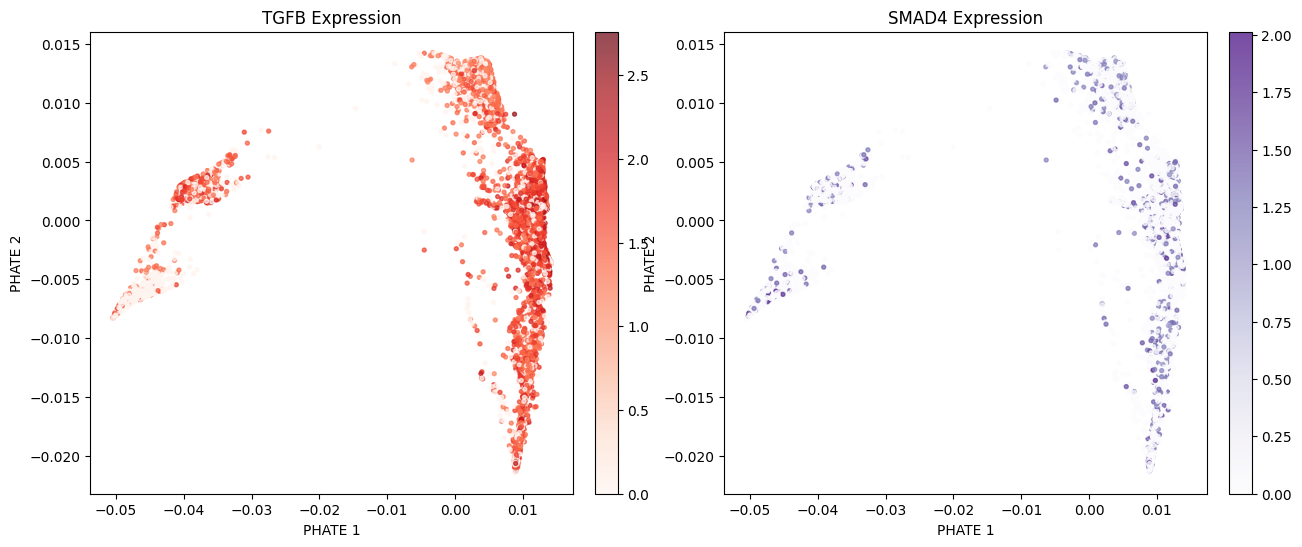

In [ ]:
# =============================================================================
# VISUALIZATIONS
# =============================================================================
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: EPCAM expression
tgfb_scatter = axes[0].scatter(
    data_phate[:, 0],
    data_phate[:, 1],
    c=tgfb_expr,
    s=8,
    cmap='Reds',
    alpha=0.7
)
axes[0].set_xlabel('PHATE 1')
axes[0].set_ylabel('PHATE 2')
axes[0].set_title(f'TGFB Expression')
plt.colorbar(tgfb_scatter, ax=axes[0], fraction=0.046, pad=0.04)

# Plot 2: CD44 expression
smad4_scatter = axes[1].scatter(
    data_phate[:, 0],
    data_phate[:, 1],
    c=smad4_expr,
    s=8,
    cmap='Purples',
    alpha=0.7
)
axes[1].set_xlabel('PHATE 1')
axes[1].set_ylabel('PHATE 2')
axes[1].set_title(f'SMAD4 Expression')
plt.colorbar(smad4_scatter, ax=axes[1], fraction=0.046, pad=0.04)

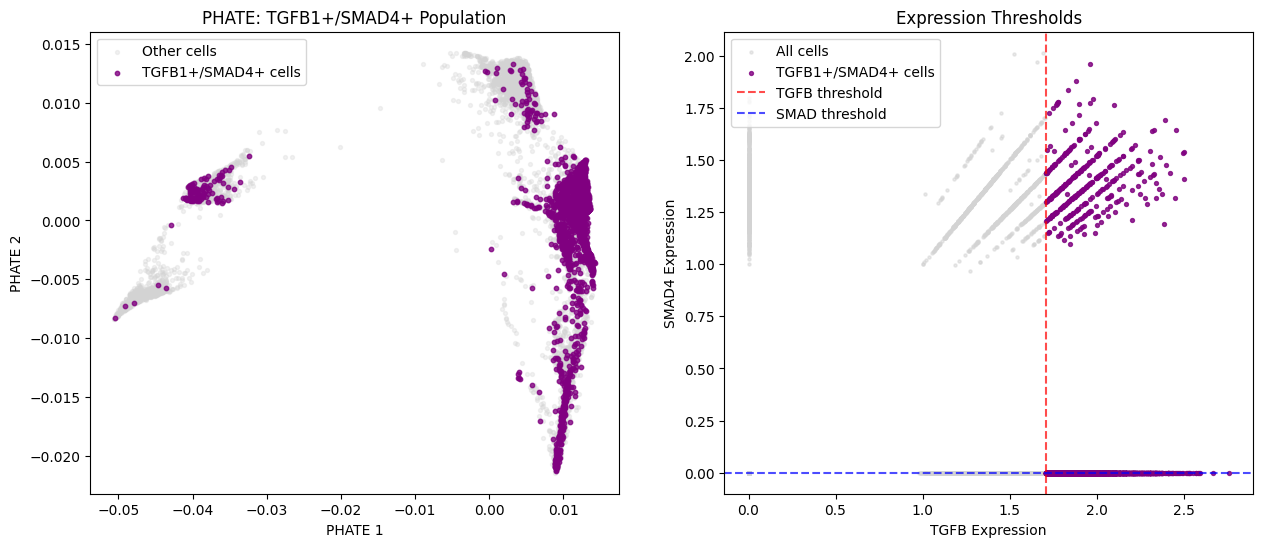

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Plot 3: EPCAM+/CD44+ population highlighted
axes[0].scatter(
    data_phate[~target_mask, 0],
    data_phate[~target_mask, 1],
    c='lightgray',
    s=8,
    alpha=0.3,
    label='Other cells'
)
axes[0].scatter(
    data_phate[target_mask, 0],
    data_phate[target_mask, 1],
    c='purple',
    s=10,
    alpha=0.8,
    label=f'{target_subpopulation} cells'
)
axes[0].set_xlabel('PHATE 1')
axes[0].set_ylabel('PHATE 2')
axes[0].set_title(f'PHATE: {target_subpopulation} Population')
axes[0].legend()

# Plot 4: Show expression thresholds as scatter plot
axes[1].scatter(tgfb_expr, smad4_expr, c='lightgray', s=5, alpha=0.5, label='All cells')
axes[1].scatter(tgfb_expr[target_mask], smad4_expr[target_mask],
                  c='purple', s=8, alpha=0.8, label=f'{target_subpopulation} cells')
axes[1].axvline(x=tgfb_threshold, color='red', linestyle='--', alpha=0.7, label=f'TGFB threshold')
axes[1].axhline(y=smad4_threshold, color='blue', linestyle='--', alpha=0.7, label=f'SMAD threshold')
axes[1].set_xlabel(f'TGFB Expression')
axes[1].set_ylabel(f'SMAD4 Expression')
axes[1].set_title('Expression Thresholds')
axes[1].legend()


Calculating PHATE...
  Running PHATE on 12381 observations and 18968 variables.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 34.39 seconds.
    Calculating KNN search...
    Calculated KNN search in 1.80 seconds.
    Calculating affinities...
    Calculated affinities in 5.45 seconds.
  Calculated graph and diffusion operator in 44.27 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.47 seconds.
    Calculating KMeans...
    Calculated KMeans in 16.18 seconds.
  Calculated landmark operator in 20.66 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 5.50 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 2.40 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 7.63 seconds.
Calculated PHATE in 82.51 seconds.


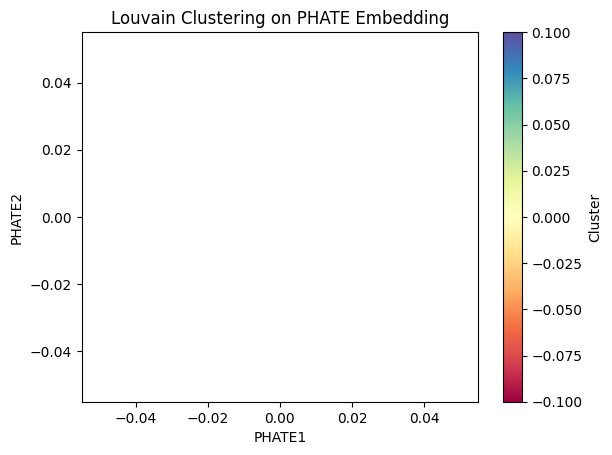

In [ ]:
import numpy as np
import pandas as pd
import phate
from sklearn.neighbors import kneighbors_graph
import networkx as nx
import community  # pip install python-louvain

# Step 1: Run PHATE as you did previously
phate_op = phate.PHATE(n_components=2, knn=5, decay=15, t='auto', gamma=1, n_jobs=-2)
data_phate = phate_op.fit_transform(data)
df_phate = pd.DataFrame(data_phate, index=data.index)

# Step 2: Build a kNN graph from the PHATE embedding
knn_graph = kneighbors_graph(df_phate.values, n_neighbors=5, mode='connectivity', include_self=False)
G = nx.from_scipy_sparse_array(knn_graph)

# Step 3: Apply Louvain clustering
partition = community.best_partition(G, resolution=1.0)  # Adjust resolution value as needed

# Step 4: Add cluster labels to your dataframe
df_phate['louvain_cluster'] = pd.Series(partition)

# Optional: Visualize clusters
import matplotlib.pyplot as plt
plt.scatter(df_phate[0], df_phate[1], c=df_phate['louvain_cluster'], cmap='Spectral')
plt.xlabel('PHATE1')
plt.ylabel('PHATE2')
plt.title('Louvain Clustering on PHATE Embedding')
plt.colorbar(label='Cluster')
plt.show()


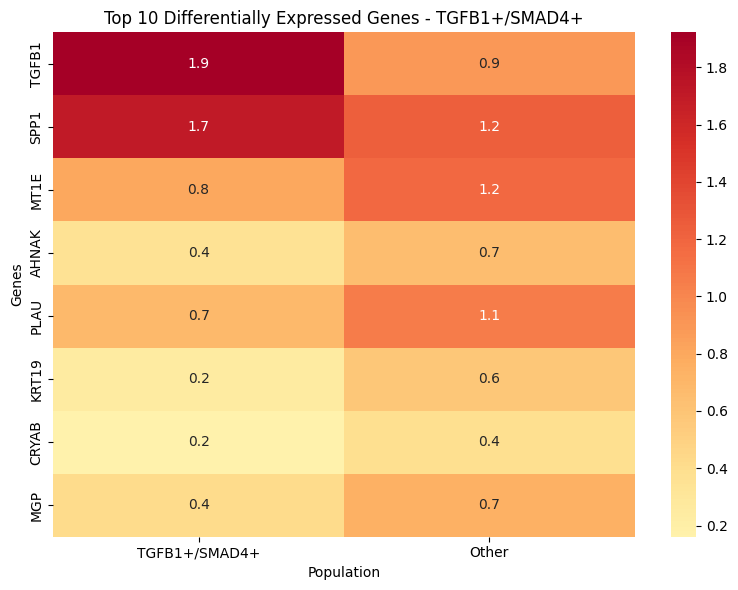

In [ ]:
# Heatmap showing expression patterns

top_genes = deg_df.head(10)['gene'].values

# Create binary labels for EPCAM+/CD44+ vs others
population_labels = pd.Series(
    ['Other'] * len(expression_df),
    index=expression_df.index
)
population_labels[target_mask] = target_subpopulation


# Calculate mean expression for each population
mean_expr_data = []
for pop in [target_subpopulation, 'Other']:
    pop_mask = population_labels == pop
    pop_mean = expression_df[pop_mask][top_genes].mean()
    mean_expr_data.append(pop_mean)

mean_expr_df = pd.DataFrame(mean_expr_data, index=[target_subpopulation, 'Other'])

plt.figure(figsize=(8, 6))
sns.heatmap(mean_expr_df.T, annot=True, cmap='RdYlBu_r', center=0, fmt='.1f')
plt.title(f'Top 10 Differentially Expressed Genes - {target_subpopulation}')
plt.xlabel('Population')
plt.ylabel('Genes')
plt.tight_layout()
plt.show()

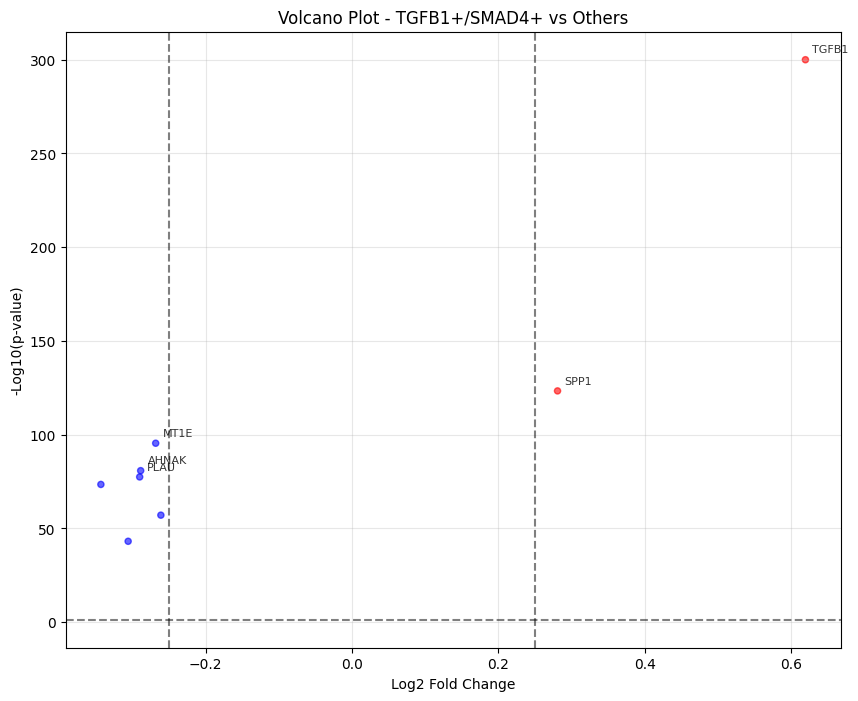

In [ ]:
# 4. Volcano plot
if len(deg_results) > 0:
    all_deg_df = pd.DataFrame(deg_results)

    plt.figure(figsize=(10, 8))

    # Calculate -log10(p-value)
    neg_log_pval = -np.log10(all_deg_df['pval'] + 1e-300)  # Add small value to avoid log(0)

    # Color points based on significance and fold change
    colors = ['gray'] * len(all_deg_df)
    for i, (_, row) in enumerate(all_deg_df.iterrows()):
        if row['pval'] < 0.05 and abs(row['logfc']) > logfc_threshold:
            colors[i] = 'red' if row['logfc'] > 0 else 'blue'

    plt.scatter(all_deg_df['logfc'], neg_log_pval, c=colors, alpha=0.6, s=20)

    # Add significance lines
    plt.axhline(y=-np.log10(0.05), color='black', linestyle='--', alpha=0.5)
    plt.axvline(x=logfc_threshold, color='black', linestyle='--', alpha=0.5)
    plt.axvline(x=-logfc_threshold, color='black', linestyle='--', alpha=0.5)

    # Label top genes
    for _, row in deg_df.head(5).iterrows():
        plt.annotate(row['gene'],
                    (row['logfc'], -np.log10(row['pval'] + 1e-300)),
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=8, alpha=0.8)

    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-Log10(p-value)')
    plt.title(f'Volcano Plot - {target_subpopulation} vs Others')
    plt.grid(True, alpha=0.3)
    plt.show()

In [ ]:
print("\n" + "="*50)
print("ANALYSIS COMPLETE")
print("="*50)
print(f"Target population: {target_subpopulation}")
print(f"Population size: {n_target} cells ({n_target/len(expression_df)*100:.1f}%)")
print(f"TGFB threshold: {tgfb_threshold:.2f}")
print(f"SMAD4 threshold: {smad4_threshold:.2f}")
print(f"Total differential genes found: {len(deg_df)}")
if len(deg_df) > 0:
    print(f"Top gene: {deg_df.iloc[0]['gene']} (LogFC: {deg_df.iloc[0]['logfc']:.2f}, p-val: {deg_df.iloc[0]['pval']:.2e})")

# Additional analysis: Show EPCAM/CD44 expression statistics
print(f"\nTGFB/SMAD4 Expression Statistics:")
print(f"TGFB - Mean: {tgfb_expr.mean():.2f}, Std: {tgfb_expr.std():.2f}")
print(f"SMAD4 - Mean: {smad4_expr.mean():.2f}, Std: {smad4_expr.std():.2f}")
print(f"TGFB+/SMAD4+ - Mean EPCAM: {tgfb_expr[target_mask].mean():.2f}")
print(f"TGFB+/SMAD4+ - Mean CD44: {smad4_expr[target_mask].mean():.2f}")


ANALYSIS COMPLETE
Target population: TGFB1+/SMAD4+
Population size: 3096 cells (25.0%)
TGFB threshold: 1.71
SMAD4 threshold: 0.00
Total differential genes found: 8
Top gene: TGFB1 (LogFC: 0.62, p-val: 0.00e+00)

TGFB/SMAD4 Expression Statistics:
TGFB - Mean: 1.16, Std: 0.76
SMAD4 - Mean: 0.18, Std: 0.47
TGFB+/SMAD4+ - Mean EPCAM: 1.92
TGFB+/SMAD4+ - Mean CD44: 0.18
